## Memberships organisations
### Show proTrump members and all Prosecutors & DOJ
#### used all_noemploy.csv

In [1]:
import csv
import networkx as nx
import collections

#G = nx.Graph()
G = nx.DiGraph() 

In [2]:
# Add Nodes Persone

# all_noemploy.csv

protectFromDublicat = list()
with open('all_noemploy.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)

    # add nodes
    for row in reader:
        if row['person'] not in protectFromDublicat:
            protectFromDublicat.append(row['person'])
            
            G.add_node(row['id'],
                person = row['person'],
                url = "NA",
                position_current = row['position_current'],
                source = row['source'],
                date_of_appointment = row['date_of_appointment'],
                date_of_birth = row['date_of_birth'],
                age = row['age'],
                birthplace = row['birthplace'],
                sex = row['sex'],
                bachelors = row['bachelors'],
                masters = row['masters'],
                doctorate = row['doctorate'],
                law = row['law'],
                law_conservative_score = row['law_conservative_score'],
                law_rank = row['law_rank'],
                barr_appointment = row['barr_appointment'],
                political_affiliation = row['political_affiliation'],
                       
                connection_trump_all=row['connection_trump_all'],
                connection_trump_interviews=row['connection_trump_interviews'],
                connection_trump_campaign=row['connection_trump_campaign'],
                connection_trumpally_all=row['connection_trumpally_all'],
                connection_trumpally_innercircle=row['connection_trumpally_innercircle'],
                #connection_trumpally_wh_counsel=row['connection_trumpally_wh_counsel'],
                connection_trumpally_us_senate=row['connection_trumpally_us_senate'],
                connection_trumpally_state_gov=row['connection_trumpally_state_gov'],
               
                       connection_trumpally_rnc = row['connection_trumpally_rnc'],        
                
                connection_conservative_all=row['connection_conservative_all'],
                connection_conservative_lawschool=row['connection_conservative_lawschool'],
                connection_conservative_firm=row['connection_conservative_firm'],
                connection_conservative_group=row['connection_conservative_group'],
                connection_conservative_gov=row['connection_conservative_gov'],
                
                       connection_careerprofessional_all=row['connection_careerprofessional_all'],
                
                       connection_other_all=row['connection_other_all'],
                
                #organisations
                american_center_for_law_and_justice = row['american_center_for_law_and_justice'],
                christian_legal_society_bar_association = row['christian_legal_society_bar_association'],
                federalist_society = row['federalist_society'],
                heritage_foundation = row['heritage_foundation'],
                national_rifle_association_tie = row['national_rifle_association_tie'],
                republican_national_lawyers_association_tie = row['republican_national_lawyers_association_tie']
                      )
           
       

In [3]:
# add image

for node in G.nodes.data():
    if int(node[0]) < 500:

        with open('all_noemploy_img.csv', newline='') as csvfile:
            reader = csv.DictReader(csvfile)
            for row in reader:
                if node[1]['person'] == row['person']:
                    G.nodes[node[0]]['url'] = row['url']
                

In [4]:


# nodes organisations
organisations = ['american_center_for_law_and_justice' ,
                'christian_legal_society_bar_association',
                'federalist_society',
                'heritage_foundation',
                'national_rifle_association_tie' ,
                'republican_national_lawyers_association_tie' ]

Law = ['connection_conservative_lawschool',
               'connection_conservative_firm']

conservatism = organisations   #+Law


id = 500
for node in conservatism:
    G.add_node(id,conservatism = node)
    id +=1

# add nodes organisations 

In [5]:
for node in G.nodes.data():
    if int(node[0]) >= 500:
        print(node)

(500, {'conservatism': 'american_center_for_law_and_justice'})
(501, {'conservatism': 'christian_legal_society_bar_association'})
(502, {'conservatism': 'federalist_society'})
(503, {'conservatism': 'heritage_foundation'})
(504, {'conservatism': 'national_rifle_association_tie'})
(505, {'conservatism': 'republican_national_lawyers_association_tie'})


In [6]:
#add edges to Pro trump 
for node in G.nodes.data():
    if int(node[0]) < 500: 
        #print(node[0],node[1]['person'],node[1]['connection_trump'])
        if node[1]['american_center_for_law_and_justice'] == '1':
            G.add_edge(node[0],500)
        if node[1]['christian_legal_society_bar_association'] == '1':
            G.add_edge(node[0],501)
        if node[1]['federalist_society'] == '1':
            G.add_edge(node[0],502)
        if node[1]['heritage_foundation'] == '1':
            G.add_edge(node[0],503)
        if node[1]['national_rifle_association_tie'] == '1':
            G.add_edge(node[0],504)
        if node[1]['republican_national_lawyers_association_tie'] == '1':
            G.add_edge(node[0],505)
            
        #if node[1]['connection_conservative_lawschool'] == '1':
         #   G.add_edge(node[0],506)
        #if node[1]['connection_conservative_firm'] == '1':
         #   G.add_edge(node[0],507)

In [7]:
# add color law rank
for node in G.nodes.data():
    if int(node[0]) < 500 and node[1]['law_rank'] != 'NA': 
        if int(node[1]['law_rank']) in range(0,51):
            G.nodes[node[0]]['color_law_rank'] = 'green'
        if int(node[1]['law_rank']) in range(51,101):
            G.nodes[node[0]]['color_law_rank'] = 'yellow'
        if int(node[1]['law_rank']) in range(101,201):
            G.nodes[node[0]]['color_law_rank'] = 'red'


In [8]:
# add short NAME to DOJ and prosecutor
for node in G.nodes.data():
    if int(node[0]) < 500: 
        if node[1]['source'] == 'prosecutor':
            G.nodes[node[0]]['short_source'] = 'P'
        if node[1]['source'] == 'justicedept':
            G.nodes[node[0]]['short_source'] = 'J'


In [9]:
#Analise for in_degree 
for node in G.nodes.data():
    G.nodes[node[0]]['predecessors'] = len(list(G.predecessors(node[0])))

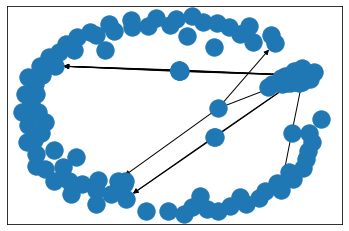

In [10]:
#check net
pos=nx.spring_layout(G)
nx.draw_networkx(G,pos,with_labels=False)

In [11]:
nx.write_gexf(G, "2C_conservatism.gexf")